In [ ]:
! pip install git+https://github.com/fxmeng/peft.git

In [3]:
import torch
from diffusers import DiffusionPipeline
pipe = DiffusionPipeline.from_pretrained("stabilityai/stable-diffusion-xl-base-1.0", torch_dtype=torch.float16, use_safetensors=True, variant="fp16").to("cuda")

In [ ]:
from peft import PiSSAConfig, PeftModel
pissa_config = PiSSAConfig(r=4, init_pissa_weights=True, target_modules={'to_v', 'to_k', 'to_out.0', 'to_q', 'conv1', 'conv2'})
pissa_unet= PeftModel(pipe.unet, pissa_config)
pipe.to("cuda")

Finetune PiSSA Adapter

100%|██████████| 50/50 [00:15<00:00,  3.23it/s]


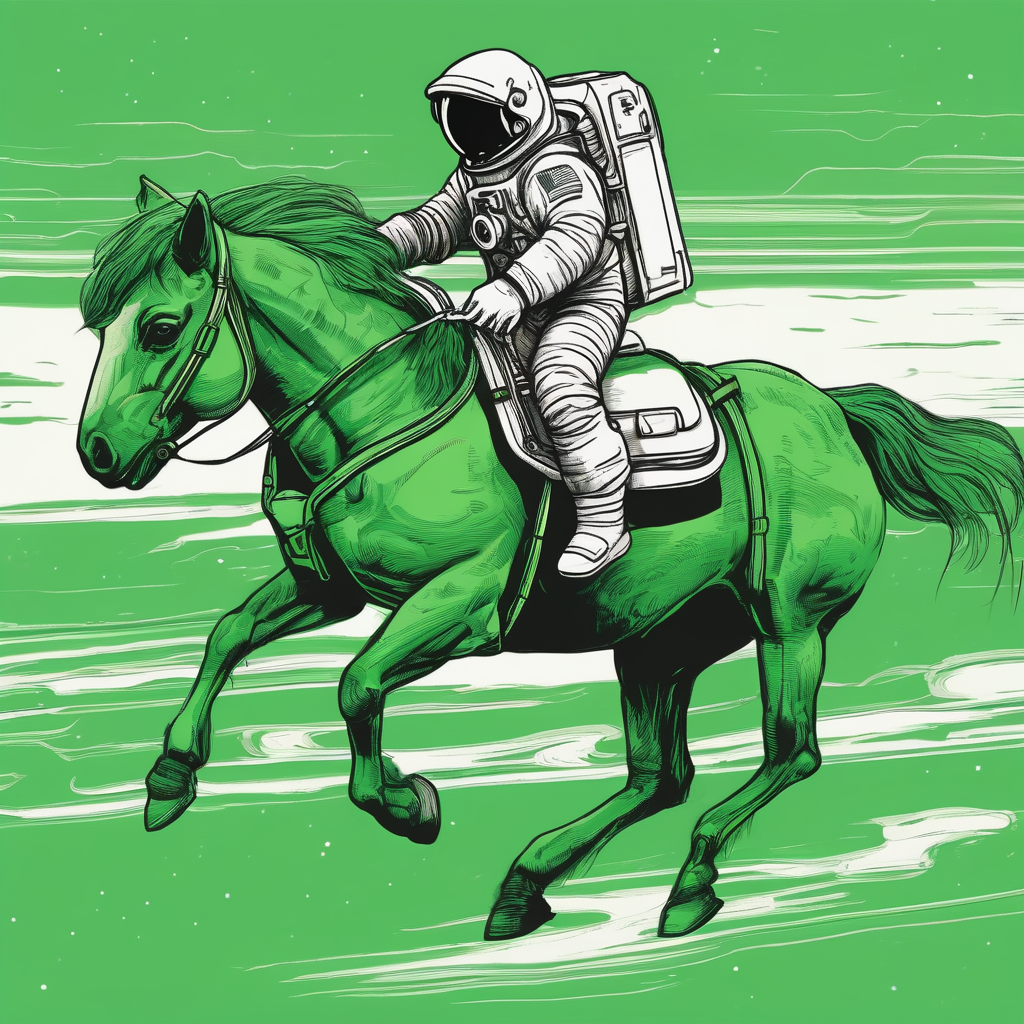

In [ ]:
prompt = "An astronaut riding a green horse"
images = pipe(prompt=prompt).images[0]
images

In [ ]:
pissa_unet.save_pretrained("pissa-sdxl")

In [ ]:
import torch
from diffusers import DiffusionPipeline
pipe = DiffusionPipeline.from_pretrained("stabilityai/stable-diffusion-xl-base-1.0", torch_dtype=torch.float16, use_safetensors=True, variant="fp16").to("cuda")
from peft import PiSSAConfig, PeftModel
pissa_config = PiSSAConfig.from_pretrained("pissa-sdxl")
pissa_config.init_pissa_weights=True
pissa_unet = PeftModel(pipe.unet, pissa_config)
pissa_unet.load_adapter("pissa-sdxl", adapter_name="default")
pipe.to("cuda")

100%|██████████| 50/50 [00:15<00:00,  3.27it/s]


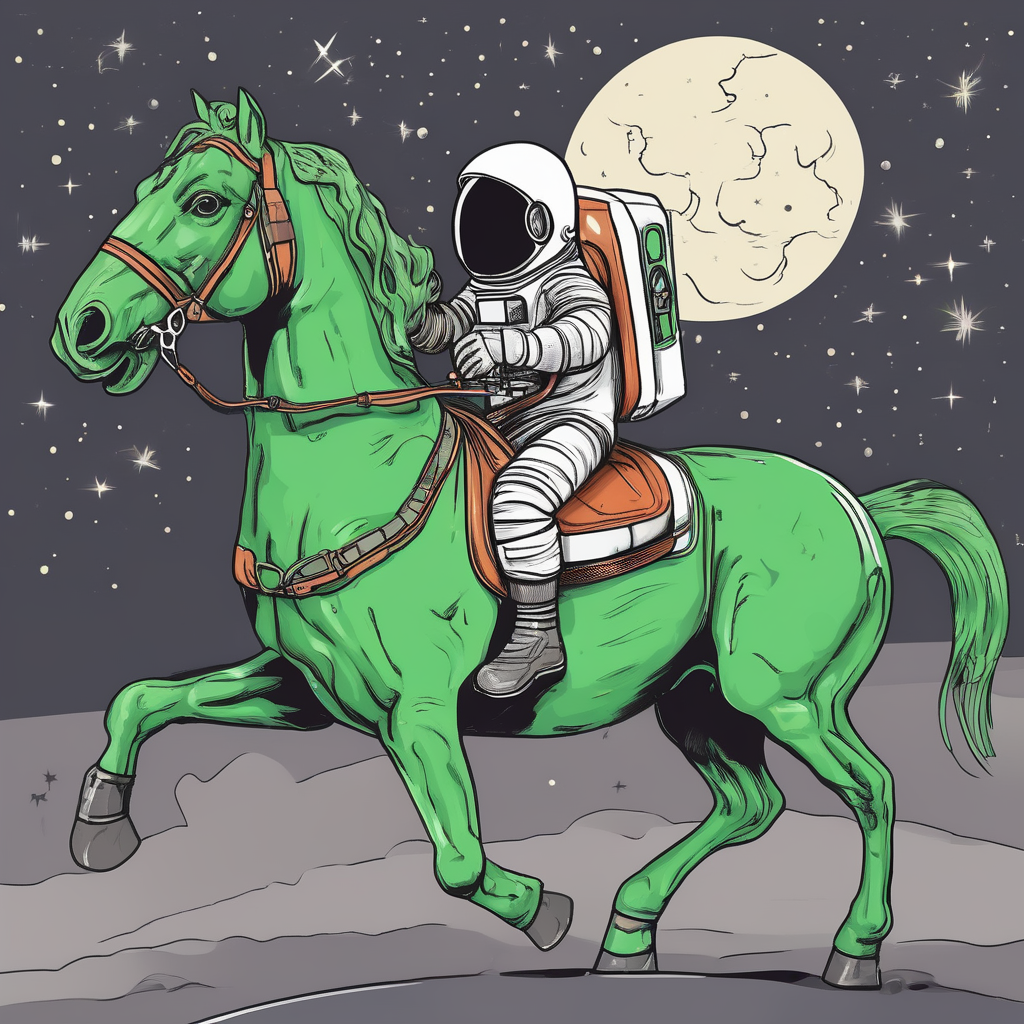

In [ ]:
pipe.to("cuda")
prompt = "An astronaut riding a green horse"
images = pipe(prompt=prompt).images[0]
images